In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
import os

python_directory = os.path.abspath("")


# Appendix 1 graph

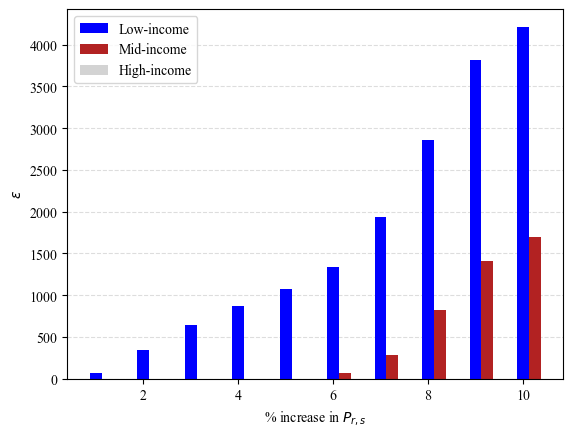

In [9]:
## Read sensitivity results
df = pd.read_pickle(rf"{python_directory}\Data\sensitivity_df.pkl")
df_oneSeed = df[df["run"] == 1]
## Separate between the different "modify_prices_percent" experiments
results_df_dict = {}
## remove next line to generate the graph for all the runs
df = df_oneSeed
for price in [1,2,3,4,5,6,7,8,9,10]:
    results_df_dict[price] = df[df["modify_prices_percent"] == price]

## Calculate the means and allocate them to a dictionary
means_dict = {
    "run": list(),
    "modify_prices_percent": list(),
    "low": list(),
    "mid": list(),
    "high": list(),
}
for price in results_df_dict:
    for parameter in means_dict:
        means_dict[parameter].append(np.mean(results_df_dict[price][parameter]))

## Generate a dataframe with the means of each experiment
means_df = pd.DataFrame(means_dict)

## Generate a box plot
x_axis = means_df["modify_prices_percent"]
width = 0.25
plt.figure()
plt.rcParams["font.family"] = "Times New Roman"
plt.xlabel(r"% increase in $P_{r,s}$")
plt.ylabel(r"$\epsilon$")
plt.grid(axis="y", which='major', color='#DDDDDD', linestyle="--", linewidth=0.8)
plt.bar(x_axis, means_df["low"], label="Low-income", color="blue", width=width, zorder=2)
plt.bar(x_axis + width, means_df["mid"], label="Mid-income", color="firebrick", width=width, zorder=2)
plt.bar(x_axis + width, means_df["high"], label="High-income", color="lightgrey", width=width, zorder=2)
plt.legend()
plt.savefig(rf"{python_directory}\Outcomes\sensitivity.png")
plt.show()
plt.close()

# Appendix 2 graph
## Number of road segments, cost and gentrification

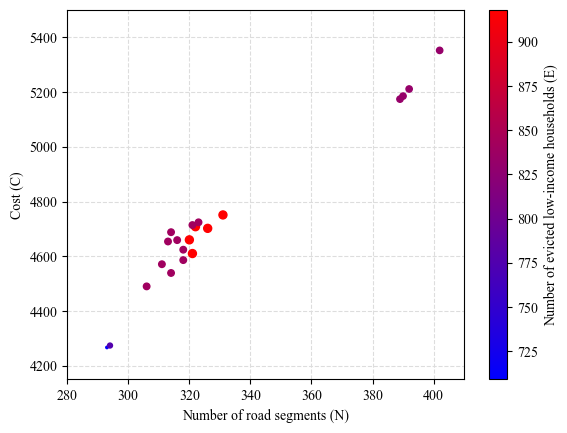

In [52]:
# load file
df = pd.read_csv(rf"{python_directory}\Data\results_annealing_filtered_final.csv")

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","red"])
plt.figure()
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(which='major', color='#DDDDDD', linestyle="--", linewidth=0.8)
plt.grid(which='minor', color='#DDDDDD', linestyle="--", linewidth=0.8)
sc = plt.scatter(
    df["Feature Count"], 
    df["Cost"], 
    s=[( (  (c - min(df["Gentrification"])) / (max(df["Gentrification"]) - min(df["Gentrification"]) ) ) + 0.1) * 30 for c in df["Gentrification"]], c=df["Gentrification"], 
    cmap=cmap,
    zorder=2
    )
cbar = plt.colorbar(sc)
cbar.set_label('Number of evicted low-income households (E)')
plt.xlim([280, 410])
plt.ylim([4150, 5500])
plt.xlabel("Number of road segments (N)")
plt.ylabel("Cost (C)")
plt.savefig(rf"{python_directory}\Outcomes\cost_features_evict.png")
plt.show()
plt.close()

## Performance and gentrification

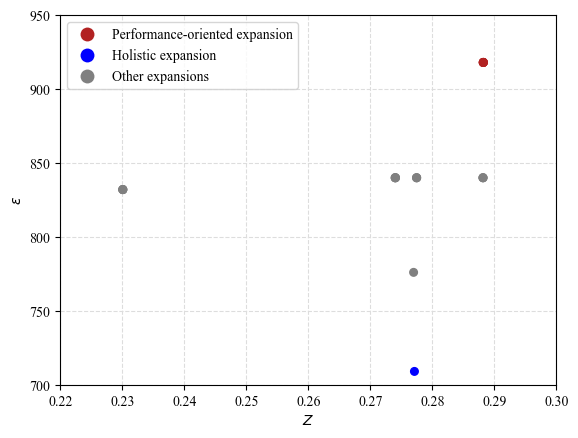

In [53]:
# load file
df = pd.read_csv(rf"{python_directory}\Data\results_annealing_filtered_final.csv")

performance_colour = "firebrick"
holistic_colour = "blue"
others_colour = "grey"
## return the label and colour of the data point
def generate_name_color(gentrification):
    if gentrification > 900: return ("Performance-oriented expansion", performance_colour)
    elif gentrification < 750: return ("Holistic expansion", holistic_colour)
    else: return ("Other expansions", others_colour)
df["Name"] = [generate_name_color(df.at[i, "Gentrification"])[0] for i in df.index]
df["Colour"] = [generate_name_color(df.at[i, "Gentrification"])[1] for i in df.index]

colours = {
    "Performance-oriented expansion": performance_colour,
    "Holistic expansion": holistic_colour,
    "Other expansions": others_colour
}
def create_custom_legend_handles(colours=colours):
    handles, labels = plt.gca().get_legend_handles_labels()
    extend_list = []
    for school_str in colours:
        point = Line2D([0], [0], label=school_str, marker='o', markersize=10, markeredgecolor="none", markerfacecolor=colours[school_str], linestyle="")
        extend_list.append(point)
    handles.extend(extend_list)
    return(handles)

plt.figure()
plt.rcParams["font.family"] = "Times New Roman"
plt.grid(which='major', color='#DDDDDD', linestyle="--", linewidth=0.8)
plt.grid(which='minor', color='#DDDDDD', linestyle="--", linewidth=0.8)
sc = plt.scatter(
    df["Metric"], 
    df["Gentrification"],
    c=list(df["Colour"]),
    s=30,
    zorder=2
    )
plt.xlim([0.22, 0.3])
plt.ylim([700, 950])
plt.xlabel(r"$Z$")
plt.ylabel(r"$\epsilon$")
plt.legend(handles=create_custom_legend_handles(colours))
plt.savefig(rf"{python_directory}\Outcomes\performance_gentrification.png")
plt.show()
plt.close()